  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Travel Review Clustering
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Context:
This data set is populated by capturing user ratings from Google reviews. Reviews are captured across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

## Data Definition:

Input variables:

1) **User** Unique user id 


2) **Attribute 1:** Average ratings on churches 


3) **Attribute 2:** Average ratings on resorts  


4) **Attribute 3:** Average ratings on beaches  


5) **Attribute 4:** Average ratings on parks  


6) **Attribute 5:** Average ratings on theatres  


7) **Attribute 6:** Average ratings on museums  


8) **Attribute 7:** Average ratings on malls  


9) **Attribute 8:** Average ratings on zoo  


10) **Attribute 9:** Average ratings on restaurants  


11) **Attribute 10:** Average ratings on pubs/bars  


12) **Attribute 11:** Average ratings on local services  


13) **Attribute 12:** Average ratings on burger/pizza shops  


14) **Attribute 13:** Average ratings on hotels/other lodgings  


15) **Attribute 14:** Average ratings on juice bars  


16) **Attribute 15:** Average ratings on art galleries 


17) **Attribute 16:** Average ratings on dance clubs  


18) **Attribute 17:** Average ratings on swimming pools  


19) **Attribute 18:** Average ratings on gyms  


20) **Attribute 19:** Average ratings on bakeries  


21) **Attribute 20:** Average ratings on beauty & spas  


22) **Attribute 21:** Average ratings on cafes  


23) **Attribute 22:** Average ratings on view points  


24) **Attribute 23:** Average ratings on monuments  


25) **Attribute 24:** Average ratings on gardens 




<a id='import_packages'></a>
## 1. Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)     ###max set of columns are need to be display(none refers to all)
from warnings import filterwarnings
filterwarnings('ignore')

<a id='Read_Data'></a>
## 2. Read the Data

In [3]:
# read the data
df = pd.read_csv('google_review_ratings.csv')

# print the first five rows of the data
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


<a id='Data_Types'></a>
## 3. Data Types and Dimensions

In [4]:
# check the data types for variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

Features that are named as Categories, so we need to rename category with it respective label. Also We will drop 'Unnamed: 25' feature as it is redundant

**Before manipulation of data, let's check dimension of dataset**

In [5]:
df.shape

(5456, 26)

**We see that dataframe has 5456 instances and 26 features**

<a id='Data_Manipulation'></a>
## 4. Data Manipulation
Here we will change features names and remove redundant feature

**Droping redundant feature**

In [6]:
df.drop('Unnamed: 25',axis =1,inplace=True)

In [7]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


**Renaming features**       
To perform the action we will create list containing actual names of features

In [8]:
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 
                'theatres', 'museums', 'malls', 'zoo', 'restaurants', 
                'pubs_bars', 'local_services', 'burger_pizza_shops', 
                'hotels_other_lodgings', 'juice_bars', 'art_galleries', 
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']


Applying above columns names to dataframe

In [9]:
df.columns = column_names

In [10]:
df.head()

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   object 
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

**Since local_services is numeric, it is represented as categorical**      
so we want to debug it.

In [12]:
df.local_services.unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

#### There is a data as '2\t2.' which cannot be converted to float. So need to modified to 2.2 

In [13]:
df[df.local_services =='2\t2.']

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
2712,User 2713,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,2\t2.,NaN,0.84,5.0,5.0,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57


In [14]:
df[df.local_services =='2\t2.']['local_services']

2712    2\t2.
Name: local_services, dtype: object

In [15]:
# Copying the original Dataset
df1 = df.copy(deep=True)

In [16]:
df.loc[2712,'local_services'] = 2.2

**Changing data type of local_services**

In [17]:
df[df.local_services =='2\t2.']['local_services']

Series([], Name: local_services, dtype: object)

In [18]:
df['local_services'] = df.local_services.astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   float64
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

<a id='Statistical_Summary'></a>
## 5. Statistical Summary


In [20]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550007,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381651,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
# data frame with categorical features
df.describe(include='object')

,user_id
count,5456
unique,5456
top,User 1
freq,1


user_id is unique for all instances so we are going to drop it

In [22]:
df.drop('user_id',axis=1,inplace=True)

In [23]:
df.shape

(5456, 24)

## 6. Handling Missing Values


In [24]:
miss_vals = df.isnull().sum()
miss_vals[miss_vals>0]

burger_pizza_shops    1
gardens               1
dtype: int64

#### We have missing values in only 1 records so will treat them using mean

In [25]:
df = df.fillna(df.mean())

#### Now will confirm that there is no null values in the dataframe

In [26]:
miss_vals = df.isnull().sum()
miss_vals[miss_vals>0]

Series([], dtype: int64)

**Lets check if users have rated all the features**

In [27]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


#### Now will extract only those features where all the users have given the ratings 

In [28]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.550007,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.381651,1.249094,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171649
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,3.220000,2.282500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [29]:
df.describe().loc['min']>0

churches                 False
resorts                  False
beaches                  False
parks                     True
theatres                  True
museums                   True
malls                     True
zoo                       True
restaurants               True
pubs_bars                 True
local_services            True
burger_pizza_shops        True
hotels_other_lodgings     True
juice_bars                True
art_galleries            False
dance_clubs              False
swimming_pools           False
gyms                     False
bakeries                 False
beauty_spas              False
cafes                    False
view_points              False
monuments                False
gardens                  False
Name: min, dtype: bool

In [30]:
# Consider if the users have given the rating that means, the min rating for each features will be greater than 0 
rated_features = df.describe().loc['min']>0
rated_features[rated_features]

parks                    True
theatres                 True
museums                  True
malls                    True
zoo                      True
restaurants              True
pubs_bars                True
local_services           True
burger_pizza_shops       True
hotels_other_lodgings    True
juice_bars               True
Name: min, dtype: bool

In [31]:
len(rated_features[rated_features].index)

11

#### The above 11 features have been given a rating by all the users as the minimum value is greater than 0

### Now will see what is the number of review given by each category

In [33]:
df.astype(bool)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False
1,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False
2,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False
3,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False
4,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5452,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5453,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5454,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [34]:
df.astype(bool).sum(axis=0).sort_values()

bakeries                 4410
gyms                     4439
beauty_spas              4560
cafes                    4852
swimming_pools           4977
view_points              5111
monuments                5154
gardens                  5231
churches                 5261
dance_clubs              5344
resorts                  5366
art_galleries            5452
beaches                  5452
pubs_bars                5456
local_services           5456
zoo                      5456
hotels_other_lodgings    5456
juice_bars               5456
malls                    5456
museums                  5456
theatres                 5456
parks                    5456
restaurants              5456
burger_pizza_shops       5456
dtype: int64

<Axes: >

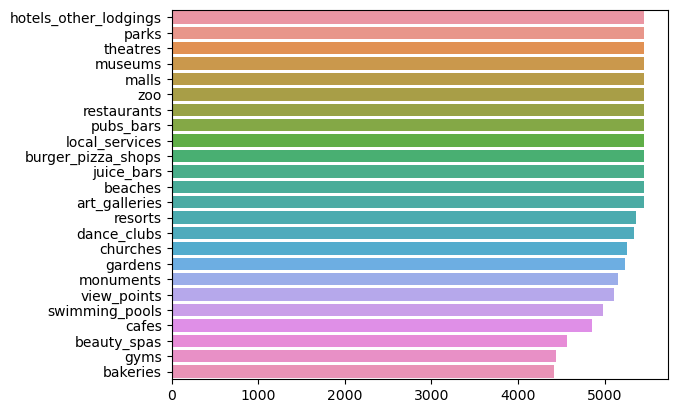

In [35]:
sns.barplot(y = df.astype(bool).sum(axis=0).sort_values(ascending = False).index,x = df.astype(bool).sum(axis=0).sort_values(ascending = False).values)

### Now will perform using K-Means Clustering

In [36]:
# Now will find the wcss value for different number of cluster
from sklearn.cluster import KMeans


wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    
    wcss.append(kmeans.inertia_)

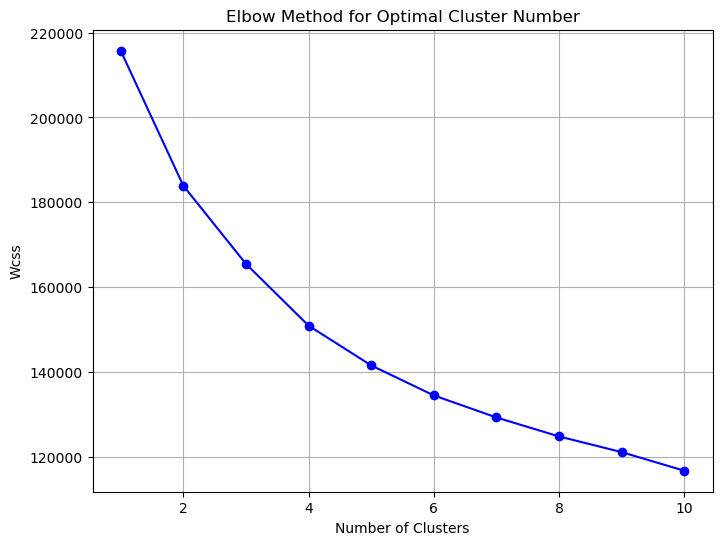

In [37]:
# Now will plot the elbow graph to select optimal value of cluster

# Plot the Elbow method results to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid(True)
plt.show()

In [38]:
# Based on the Elbow method, select the optimal number of clusters (e.g., k=2 or 4)
k_optimal = 2

# # Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

In [39]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,KMeans_Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


<Axes: xlabel='churches', ylabel='resorts'>

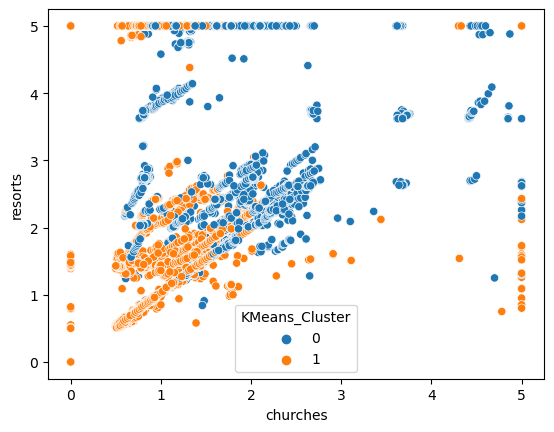

In [40]:
sns.scatterplot(x = df['churches'],y = df.resorts,hue = df.KMeans_Cluster)

### Hierarchical Clustering

In [41]:
# Calculate linkage matrix for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df.drop(columns=['KMeans_Cluster']), method='ward')

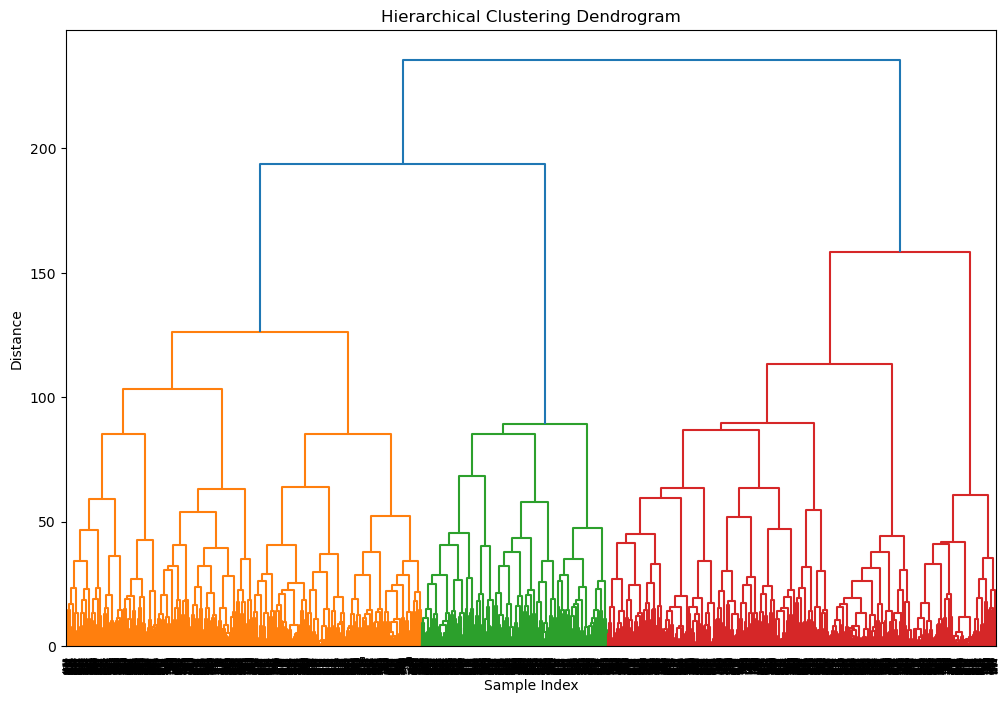

In [42]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df.index, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#### We can see that there are basically 2 clusters possible

### Creating a hierarchical clustering model

In [43]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering 

In [44]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [45]:
# Fitting the model
y_cluster = hc_model.fit_predict(df.drop(['KMeans_Cluster'],axis=1))

Adding the cluster column

In [46]:
df['Hierarchical_Cluster'] = y_cluster

In [47]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,KMeans_Cluster,Hierarchical_Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0


## 9. Evaluating the Model Performance using Silhouette Score

###  Checking silhouette_score for K-Means

In [48]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.drop(['KMeans_Cluster','Hierarchical_Cluster'],axis=1), df['KMeans_Cluster'].values)
print(f"Silhouette Score (Using scikit-learn): {silhouette_avg}")

Silhouette Score (Using scikit-learn): 0.1442531219466289


###  Checking silhouette_score for Hierarchical Clustering

In [49]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df.drop(['KMeans_Cluster','Hierarchical_Cluster'],axis=1), df['Hierarchical_Cluster'].values)
print(f"Silhouette Score (Using scikit-learn): {silhouette_avg}")

Silhouette Score (Using scikit-learn): 0.12286096764968157


<a id='Conclusion'></a>
## 9. Conclusion

By Using K-Means & heirarchical clustering we clustered review into two category, Where K-Means is performed well compared to heirarchical clustering and convert them into positive and negative review 

In [50]:
final_result = df.copy(deep=True)

In [51]:
final_result.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,KMeans_Cluster,Hierarchical_Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,0


In [52]:
final_result.KMeans_Cluster.replace({0:'Negative',1:'Positive'},inplace=True)
final_result.Hierarchical_Cluster.replace({0:'Negative',1:'Positive'},inplace=True)

In [53]:
final_result.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,KMeans_Cluster,Hierarchical_Cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Positive,Negative
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Positive,Negative
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Positive,Negative
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Positive,Negative
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Positive,Negative


In [54]:
final_result.KMeans_Cluster.value_counts()

Positive    2924
Negative    2532
Name: KMeans_Cluster, dtype: int64

In [55]:
final_result.Hierarchical_Cluster.value_counts()

Negative    3178
Positive    2278
Name: Hierarchical_Cluster, dtype: int64